In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")


In [54]:
data = pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


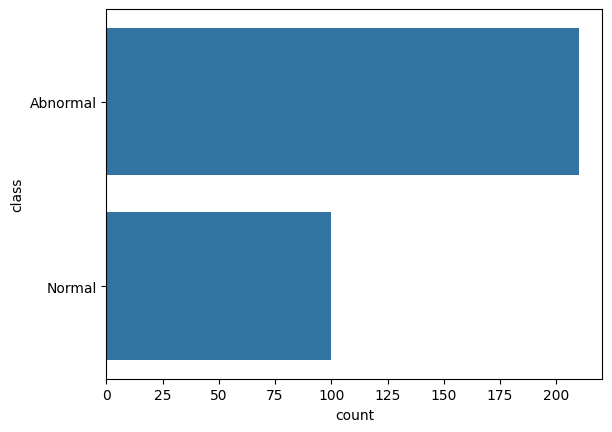

In [55]:
sns.countplot(data["class"])
plt.show()

In [56]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data ["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [57]:
data.info

<bound method DataFrame.info of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  class  
0       40.475232      98.672917                 -0.254400      1  
1  

In [58]:
y = data["class"].values 
x_data = data.drop(["class"],axis=1) # etiketler, girdilerden ayrılmalıdır.

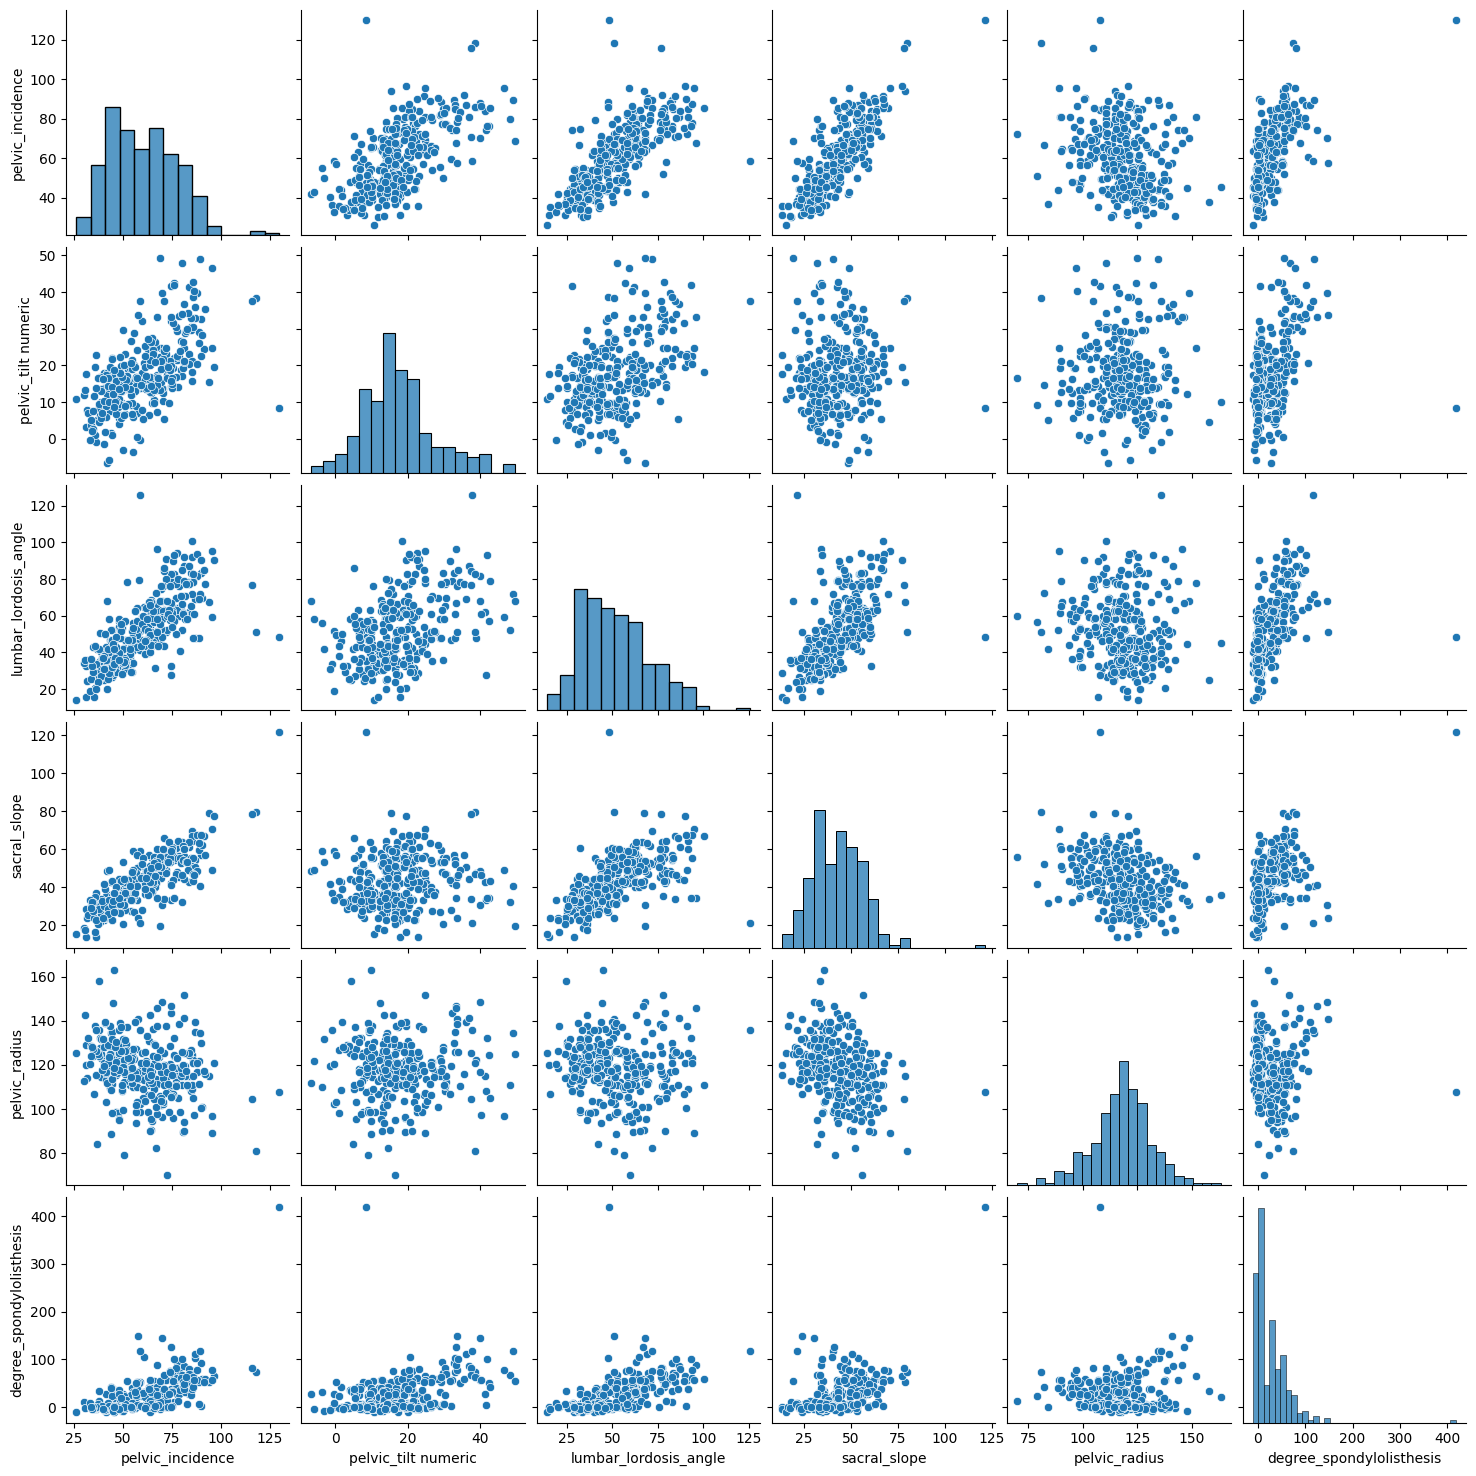

In [59]:
sns.pairplot(x_data)
plt.show()

In [60]:
#normalizasyon
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [61]:
from sklearn.model_selection import train_test_split # egitim ile testi ayrıştırma
from sklearn.linear_model import LogisticRegression

In [62]:
# %15 test, %85 egitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=42) # 

# transpose 
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


x_train:  (6, 263)
x_test:  (6, 47)
y_train:  (263,)
y_test:  (47,)


In [63]:
# egitim
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)

LogisticRegression()

In [64]:
test_dogrulugu = lr.score(x_test.T,y_test.T) 
print("test dogrulugu: {}".format(test_dogrulugu))

test dogrulugu: 0.7446808510638298


# K-En Yakın Komsu

* siniflandirma sırasında çıkarlılan özelliklerden, siniflandirilmak istenen yeni bireyin daha önceki bireylerden k tanesine yakınlıga bakılmasidir.

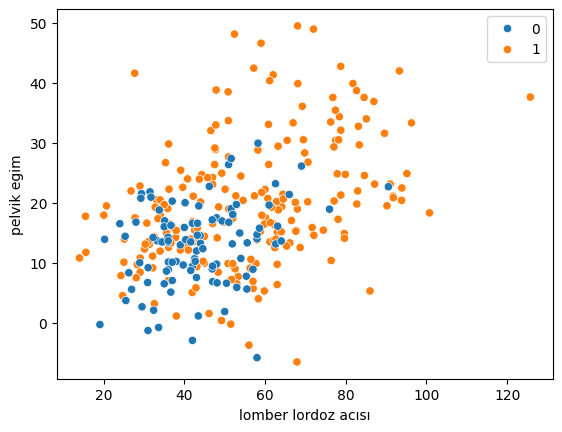

In [65]:
sns.scatterplot(data=data, x="lumbar_lordosis_angle",y="pelvic_tilt numeric", hue="class")
plt.xlabel("lomber lordoz acısı")
plt.ylabel("pelvik egim")
plt.legend()
plt.show()

# KNN
* KNN algoritması, basit ve kullanımı kolay bir sınıflandırma algoritmasıdır.
* KNN algoritmasının performansı, komşu sayısı seçimine oldukça duyarlıdır.
* KNN algoritması, büyük veri kümeleri üzerinde çalıştırıldığında hesaplama açısından pahalı olabilir.

In [68]:
y = data["class"].values
x_data = data.drop(["class"],axis=1)

In [69]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [70]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [71]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn = KNeighborsClassifier(n_neighbors= komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print("{} En yakin komşu modeli test dogrulugu: {}".format(komsu_sayisi,knn.score(x_test,y_test)))


4 En yakin komşu modeli test dogrulugu: 0.8297872340425532
